In [13]:
import numpy as np
import math
from IPython.display import Image, display

# Word: 8x1 vector

L = 4 # length of sentence
d_k, d_v = 8, 8 # length of embeded pos encoded vocab vector
# A word "hello" can be represent by a 8 dimension vector

Q = np.random.randn(L, d_k).round(2)
K = np.random.randn(L, d_k).round(2)
V = np.random.randn(L, d_v).round(2)

Q_sen = ["say  ", "hello", "to   ", "world"]
print("Q\n[")
for i in range(L):
  print(Q_sen[i], Q[i])
print("]")

K_sen = []
print("K\n", K)
print("V\n", V)

Q
[
say   [ 0.47  0.27 -0.84 -0.47 -0.18  0.77  0.68  0.49]
hello [-1.14 -3.26  0.05  0.7  -2.05 -1.11 -0.05  1.13]
to    [ 1.12 -0.82  0.76 -0.74  1.91  1.73 -0.41  0.39]
world [-0.49 -0.63 -1.93  0.87 -0.65  0.85 -0.83 -0.27]
]
K
 [[ 0.45  1.57  1.27 -1.43  1.06  0.25 -1.76 -0.18]
 [-0.81  0.84  1.5   0.87 -0.67 -0.08  0.7  -1.02]
 [-1.11 -0.42 -1.19 -1.71 -2.71 -0.8   0.94  0.79]
 [ 0.17 -1.2  -0.1  -0.17 -1.05 -1.    0.3   0.19]]
V
 [[-0.75 -0.52 -0.47 -0.93  0.78  2.02  0.26 -1.51]
 [-0.09 -0.83  0.17 -0.88  1.28  0.32  0.4  -1.86]
 [-0.59 -1.28  0.1  -0.99  0.36  1.3   0.71  1.35]
 [ 0.38 -1.42  0.7   0.17 -0.75 -1.08  1.39  0.89]]


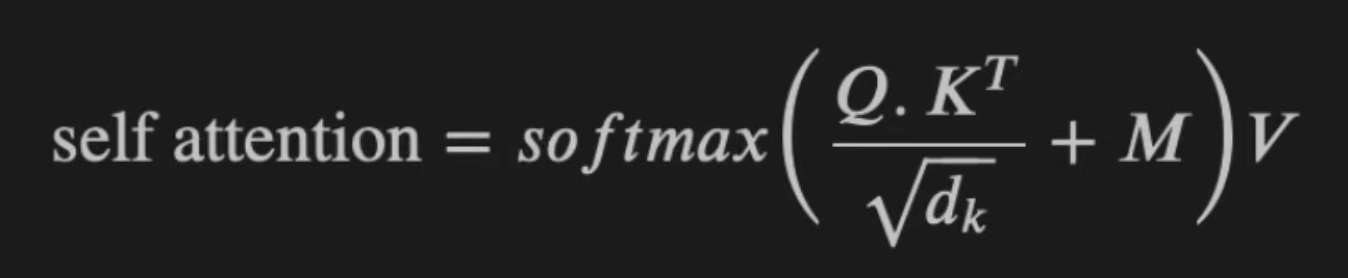

[[ 2.357   4.5344  0.5357 -0.2344]
 [ 0.7144  4.3251 -1.9377 -3.1546]
 [ 1.7895  8.8367  6.5556 -2.0883]
 [-2.3038  0.7519  2.788  -0.883 ]]
In this case, the word 'say' focus the most on 'hello' due to the high value in [0, 1]


In [14]:
display(Image("images/selfAttentionEqn.png", width=300))

# Q dot K^T
#print(np.matmul(Q, K.T))
res = np.array([[ 2.357,   4.5344,  0.5357, -0.2344], [ 0.7144,  4.3251, -1.9377, -3.1546], [ 1.7895,  8.8367,  6.5556, -2.0883], [-2.3038,  0.7519,  2.788,  -0.883 ]])
print(res)
print("In this case, the word 'say' focus the most on 'hello' due to the high value in [0, 1]")

In [15]:
# Divided by sqrt(d_k) to normalize the variance

print("Before diving sqrt(d_k)")
print(f"Q var: {Q.var().round(3)}, K var: {K.var().round(3)}, QK var: {res.var().round(3)}")

scaled = res / math.sqrt(d_k)
print("After diving sqrt(d_k)")
print(f"Q var: {Q.var().round(3)}, K var: {K.var().round(3)}, QK var: {scaled.var().round(3)}")

Before diving sqrt(d_k)
Q var: 1.197, K var: 1.083, QK var: 10.659
After diving sqrt(d_k)
Q var: 1.197, K var: 1.083, QK var: 1.332


In [16]:
# Masking: to ensure words don't get context from future words.
# It is only used in the decoder and not used in the encoder.
# The idea is that in generating translated words, the decoder
# should not see words that haven't been generated.
mask = np.tril(np.ones((L, L)))
print(mask)

print("To achieve this before softmax, we set masked part to -inf")
mask[mask == 0] = -np.infty
mask[mask == 1] = 0
print(mask)

print("And apply it to the result")
print(mask + scaled)

[[1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 1.]]
To achieve this before softmax, we set masked part to -inf
[[  0. -inf -inf -inf]
 [  0.   0. -inf -inf]
 [  0.   0.   0. -inf]
 [  0.   0.   0.   0.]]
And apply it to the result
[[ 0.83332534        -inf        -inf        -inf]
 [ 0.25257854  1.52915377        -inf        -inf]
 [ 0.63268379  3.12424525  2.31775461        -inf]
 [-0.8145163   0.26583679  0.98570685 -0.31218764]]


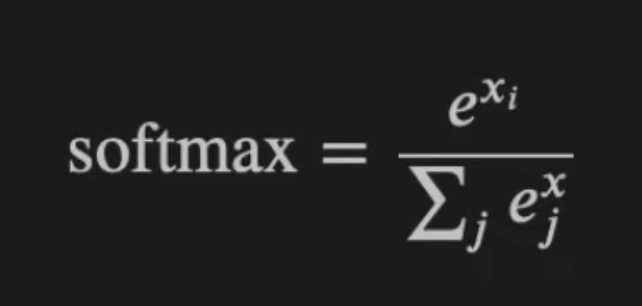

Encoder Attention:
 [[0.24481866 0.52865971 0.12858511 0.09793652]
 [0.19118528 0.68527365 0.07485733 0.04868373]
 [0.05339939 0.64507119 0.28797396 0.01355547]
 [0.0858422  0.25286704 0.51943094 0.14185982]] 

Decoder Attention:
 [[1.         0.         0.         0.        ]
 [0.21813376 0.78186624 0.         0.        ]
 [0.05413319 0.65393559 0.29193122 0.        ]
 [0.0858422  0.25286704 0.51943094 0.14185982]] 

Notice that every row will add to 1 as probability distribution.
Mask is only required by the decoder.


In [17]:
# Applying softmax

display(Image("images/softmaxEqn.png", width=200))

def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

encoder_attention = softmax(scaled)
decoder_attention = softmax(scaled + mask)

print("Encoder Attention:\n", encoder_attention, "\n")
print("Decoder Attention:\n", decoder_attention, "\n")
print("Notice that every row will add to 1 as probability distribution.")
print("Mask is only required by the decoder.")

In [18]:
# Summary of an attention head

def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask=None):
  d_k = q.shape[-1]
  scaled = np.matmul(q, k.T) / math.sqrt(d_k)
  if mask is not None:
    scaled = scaled + mask
  attention = softmax(scaled) # attention is the search result from Q and K
  new_v = np.matmul(attention, v) # apply search result to V
  return new_v, attention

print("Q\n", Q)
print("K\n", K)
print("V\n", V)

print("\nFor encoder:\n")
new_V, Attn = scaled_dot_product_attention(Q, K, V)
print("new_V\n", new_V.round(2))
print("Attn\n", Attn.round(2))

Q
 [[ 0.47  0.27 -0.84 -0.47 -0.18  0.77  0.68  0.49]
 [-1.14 -3.26  0.05  0.7  -2.05 -1.11 -0.05  1.13]
 [ 1.12 -0.82  0.76 -0.74  1.91  1.73 -0.41  0.39]
 [-0.49 -0.63 -1.93  0.87 -0.65  0.85 -0.83 -0.27]]
K
 [[ 0.45  1.57  1.27 -1.43  1.06  0.25 -1.76 -0.18]
 [-0.81  0.84  1.5   0.87 -0.67 -0.08  0.7  -1.02]
 [-1.11 -0.42 -1.19 -1.71 -2.71 -0.8   0.94  0.79]
 [ 0.17 -1.2  -0.1  -0.17 -1.05 -1.    0.3   0.19]]
V
 [[-0.75 -0.52 -0.47 -0.93  0.78  2.02  0.26 -1.51]
 [-0.09 -0.83  0.17 -0.88  1.28  0.32  0.4  -1.86]
 [-0.59 -1.28  0.1  -0.99  0.36  1.3   0.71  1.35]
 [ 0.38 -1.42  0.7   0.17 -0.75 -1.08  1.39  0.89]]

For encoder:

new_V
 [[-0.35 -1.13  0.14 -0.72  0.31  0.79  0.74  0.37]
 [-0.24 -1.32  0.31 -0.58 -0.01  0.44  0.94  1.12]
 [-0.62 -0.62 -0.34 -0.85  0.69  1.68  0.36 -1.31]
 [-0.25 -1.21  0.25 -0.62  0.17  0.51  0.84  0.61]]
Attn
 [[0.17 0.13 0.5  0.21]
 [0.   0.02 0.62 0.35]
 [0.85 0.06 0.01 0.07]
 [0.07 0.13 0.5  0.3 ]]


In [19]:
# For decoder
print("\nFor decoder:\n")
new_V, Attn = scaled_dot_product_attention(Q, K, V, mask)
print("new_V\n", new_V.round(2))
print("Attn\n", Attn.round(2))


For decoder:

new_V
 [[-0.75 -0.52 -0.47 -0.93  0.78  2.02  0.26 -1.51]
 [-0.12 -0.81  0.14 -0.88  1.25  0.41  0.39 -1.84]
 [-0.71 -0.55 -0.42 -0.93  0.81  1.9   0.28 -1.49]
 [-0.25 -1.21  0.25 -0.62  0.17  0.51  0.84  0.61]]
Attn
 [[1.   0.   0.   0.  ]
 [0.05 0.95 0.   0.  ]
 [0.92 0.06 0.02 0.  ]
 [0.07 0.13 0.5  0.3 ]]
